# Forecasting bitcoin price using Machine Learning
## Introduction:
### This is the final project in DA 516 class (Spring 2021). For this project, I choose to apply machine learning method to forecast price of cryptocurrency. I select Bitcoin (ticker BTC-USD) as a case study whose historical stock price data can be downloaded from various online resources. 
## Goals:
### The popularity of machine learning data driven approach has grown tremendously in financial market. In recent years, we have seen financial sectors adopting varieties of machine learning approaches for predictive analysis. One such example is the use of machine learning analytic in the stock market. For investors, it is incredibly valuable to make correct prediction of stock price. A successful prediction could yield significant profits to both investing firms as well as retail investors. The primary goal of this project is to leverage different machine learning methods in predicting future price of cryptocurrency.
## Data sets:
### Dataset is downloaded from yahoo finance website. There is a python API called "yfinance" which can be used to get real time dataset for any stock traded in US market. I used Bitcoin ticker "BTC-USD" to download get historical bitcoin price from yahoo finance.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import yfinance as yf

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

import mplfinance as mpl
from neuralprophet import NeuralProphet
from fbprophet import Prophet
from fbprophet.plot import plot


In /Users/rmainali/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rmainali/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rmainali/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/rmainali/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rmainali/opt/anaconda3

In [2]:
bitcoin = yf.Ticker("BTC-USD")


## Exploratory Data Analysis

In [3]:
bitcoin_df = bitcoin.history(period="max")


In [7]:
bitcoin_df


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2021-05-01,57714.664062,58448.339844,57052.273438,57828.050781,42836427360,0,0
2021-05-02,57825.863281,57902.593750,56141.906250,56631.078125,38177405335,0,0
2021-05-03,56620.273438,58973.308594,56590.871094,57200.292969,51713139031,0,0


In [8]:
bitcoin_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2419.000000,2419.000000,2419.000000,2419.000000,2.419000e+03,2419.0,2419.0
mean,7161.964519,7360.622410,6953.616390,7182.500021,1.199824e+10,0.0,0.0
std,10949.721177,11280.601580,10585.495107,10985.918746,1.893579e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,456.353485,462.204987,452.683502,456.706009,6.813795e+07,0.0,0.0
50%,4156.919434,4301.519531,4039.290039,4161.270020,3.887310e+09,0.0,0.0
75%,9078.518066,9256.199707,8829.720703,9081.762207,1.802164e+10,0.0,0.0
max,63523.753906,64863.097656,62208.964844,63503.457031,3.509679e+11,0.0,0.0


In [9]:
bitcoin_df.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### We see that there are no any missing values in the dataset. 

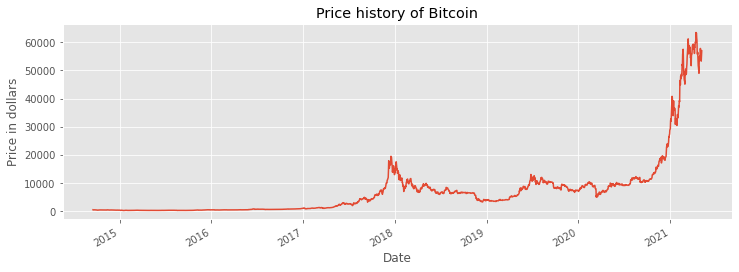

In [10]:
plt.style.use("ggplot")
fig, axs = plt.subplots(figsize=(12, 4))
bitcoin_df["Close"].plot(title="Price history of Bitcoin")
axs.set_ylabel("Price in dollars")
plt.savefig("bitcoin_price_hisotry.png", dpi=300)


### In the above plot, we can see the stock price trend of bitcoin since 2014. The bitcoin price first peaked at the end of 2018, slowed down a bit and remained mostly steady until mid 2020. Toward the end of 2020, bitcoin pick up once again at a rapid pace, growing by a factor of over 6 in a matter of few months.  

In [11]:
bitcoin_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2021-05-01,57714.664062,58448.339844,57052.273438,57828.050781,42836427360,0,0
2021-05-02,57825.863281,57902.593750,56141.906250,56631.078125,38177405335,0,0
2021-05-03,56620.273438,58973.308594,56590.871094,57200.292969,51713139031,0,0


In [12]:
dt_range = pd.date_range(start="2021-01-01", end="2021-04-30")
bitcoin_df_short = bitcoin_df[bitcoin_df.index.isin(dt_range)]

In [13]:
bitcoin_df_short

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,40730301359,0,0
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,67865420765,0,0
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,78665235202,0,0
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,81163475344,0,0
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,67547324782,0,0
...,...,...,...,...,...,...,...
2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,58284039825,0,0
2021-04-27,54030.304688,55416.964844,53319.187500,55033.117188,49448222757,0,0
2021-04-28,55036.636719,56227.207031,53887.917969,54824.703125,48000572955,0,0


In [17]:
bitcoin_df.drop(columns=["Dividends"], inplace=True)


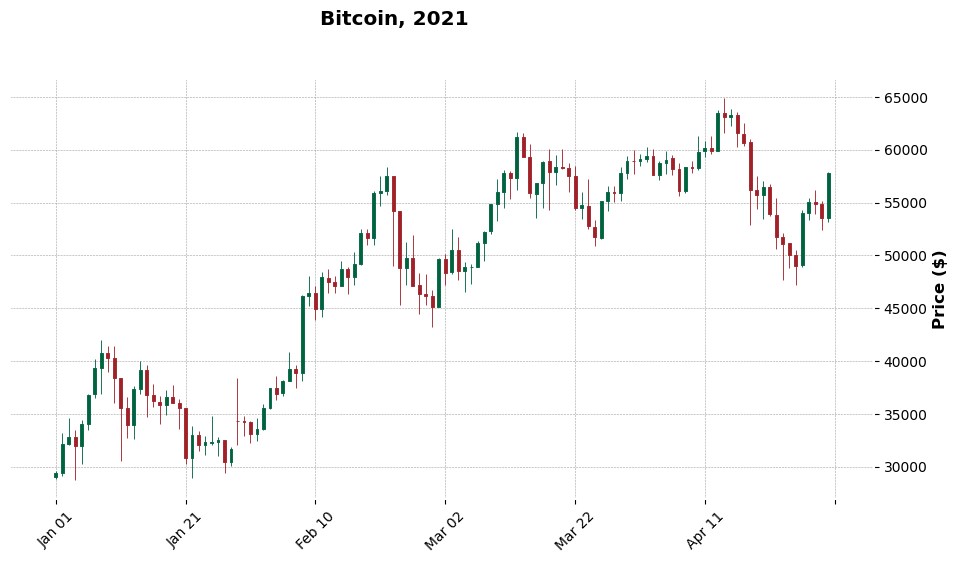

In [18]:
mpl.plot(
    bitcoin_df_short,
    type="candle",
    style="charles",
    title="Bitcoin, 2021",
    ylabel="Price ($)",
    figsize=(12, 6),
)


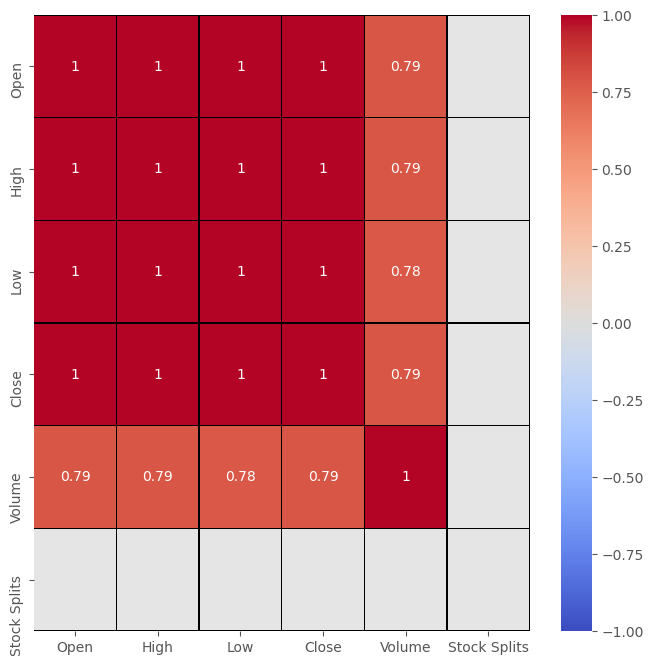

In [160]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(
    bitcoin_df.corr(),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="coolwarm",
    linewidth=0.3,
    linecolor="black",
)
bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig("bitcoin_data_corr.png", dpi=300)


### From the above correlation figure, we found that "Open", "Low", "High" and "Close" price of stock are basically same value if we consider historical dataset. For the purpose of this analysis, I will only consider "Close" price of stock and drop remaining other prices. Similarly, Stock splits and "Dividends" value doesn't seem to be correlated to any price at all. SO, I will drop that to for this analysis.

In [20]:
bitcoin_df["Close"]

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2021-05-01    57828.050781
2021-05-02    56631.078125
2021-05-03    57200.292969
2021-05-04    53333.539062
2021-05-06    56989.058594
Name: Close, Length: 2419, dtype: float64

## Data Preparation:

In [133]:
train, test = bitcoin_df["Close"].iloc[:-200], bitcoin_df["Close"].iloc[-200:]


In [23]:
scaler = MinMaxScaler()
scaler.fit(train.values.reshape(-1, 1))

MinMaxScaler()

In [24]:
train_scale = scaler.transform(train.values.reshape(-1, 1))


In [64]:
X_train = []
y_train = []
for i in range(30, len(train_scale)):
    X_train.append(train_scale[i - 30 : i, 0])
    y_train.append(train_scale[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [65]:
y_train.shape


(2189,)

In [66]:
test_scale = scaler.transform(test.values.reshape(-1, 1))
test_scale =np.append(train_scale[-30:], test_scale)
test_scale = test_scale.reshape(-1,1)


In [71]:
X_test = []
y_test = []

for i in range(30, len(test_scale)):
    X_test.append(test_scale[i - 30 : i])
    y_test.append(test_scale[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [72]:
len(X_test)


200

## LSTM model

In [73]:
model = Sequential()

model.add(
    LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))
)
model.add(Dropout(0.2))

model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(256))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30, 256)           264192    
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 256)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 256)           525312    
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 256)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 30, 256)           525312    
_________________________________________________________________
dropout_11 (Dropout)         (None, 30, 256)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 256)              

In [82]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
2189/2189 [==============================] - 29s 13ms/step - loss: 0.0012
Epoch 2/20
2189/2189 [==============================] - 35s 16ms/step - loss: 9.8940e-04
Epoch 3/20
2189/2189 [==============================] - 40s 18ms/step - loss: 0.0012
Epoch 4/20
2189/2189 [==============================] - 34s 16ms/step - loss: 0.0011
Epoch 5/20
2189/2189 [==============================] - 32s 15ms/step - loss: 0.0011
Epoch 6/20
2189/2189 [==============================] - 33s 15ms/step - loss: 0.0010
Epoch 7/20
2189/2189 [==============================] - 32s 15ms/step - loss: 0.0012
Epoch 8/20
2189/2189 [==============================] - 33s 15ms/step - loss: 8.7374e-04
Epoch 9/20
2189/2189 [==============================] - 32s 14ms/step - loss: 8.3386e-04
Epoch 10/20
2189/2189 [==============================] - 32s 14ms/step - loss: 9.4091e-04
Epoch 11/20
2189/2189 [==============================] - 32s 15ms/step - loss: 7.9340e-04
Epoch 12/20
2189/2189 [====================

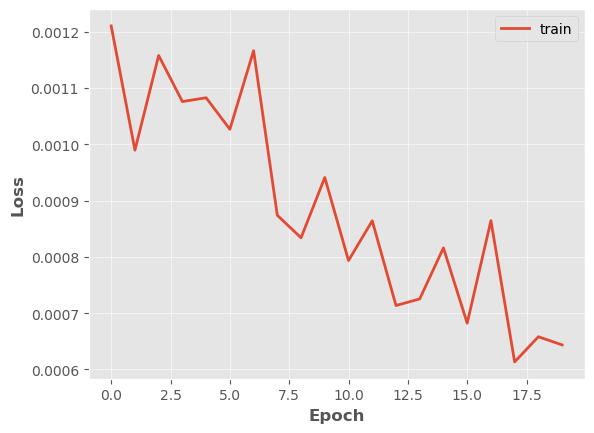

In [83]:
plt.style.use("ggplot")
plt.plot(history.history["loss"], label="train")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


### LSTM prediction

In [84]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)


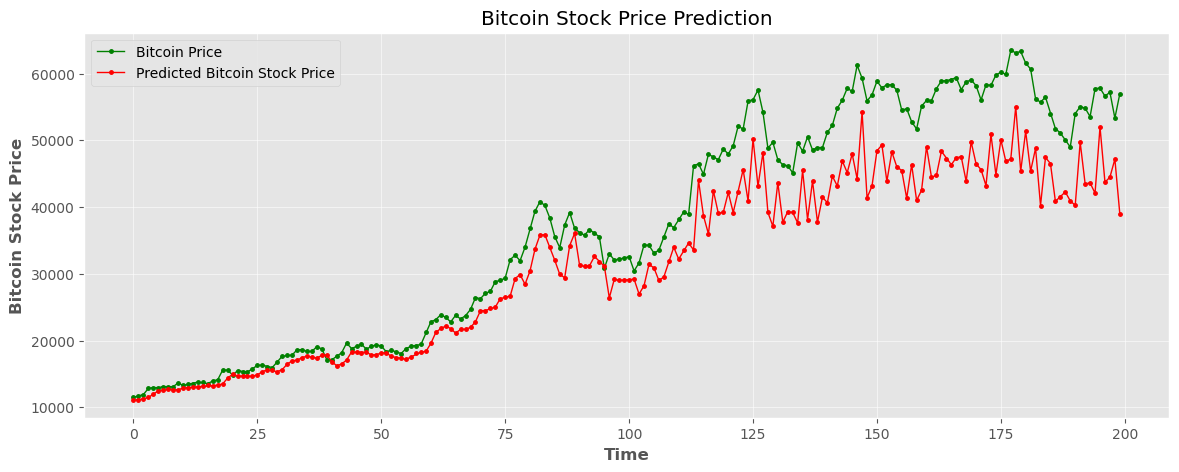

In [134]:
plt.style.use("ggplot")
plt.figure(figsize=(14, 5))
plt.plot(
    test.values,
    color="green",
    marker=".",
    markersize=5,
    label="Bitcoin Price",
    linewidth=1,
)
plt.plot(
    y_pred,
    color="red",
    marker=".",
    markersize=5,
    label="Predicted Bitcoin Stock Price",
    linewidth=1,
)
plt.title("Bitcoin Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Bitcoin Stock Price")
plt.legend()
plt.savefig("bitcoin_prediction_zoom.png", dpi=300)
plt.show()


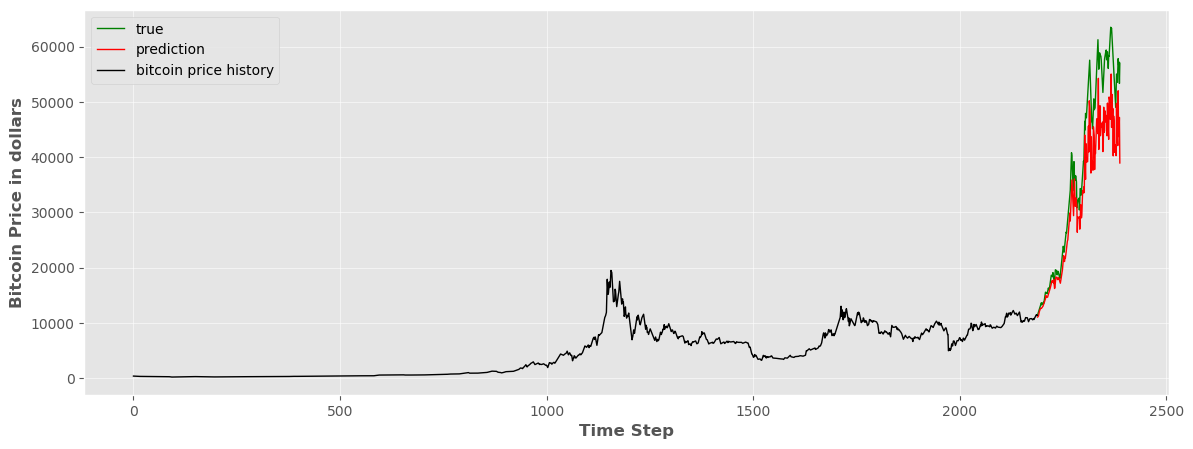

In [135]:
plt.style.use("ggplot")
plt.figure(figsize=(14, 5))
plt.plot(
    np.arange(len(y_train), len(y_train) + len(y_test)),
    test.values,
    "g",
    label="true",
    linewidth=1,
)
plt.plot(
    np.arange(len(y_train), len(y_train) + len(y_test)),
    y_pred,
    "r",
    label="prediction",
    linewidth=1,
)
plt.plot(
    np.arange(0, len(y_train)),
    scaler.inverse_transform(y_train.reshape(-1, 1)),
    "k",
    label="bitcoin price history",
    linewidth=1,
)
plt.ylabel("Bitcoin Price in dollars")
plt.xlabel("Time Step")
plt.legend()
plt.savefig("bitcoin_prediction.png", dpi=300)
plt.show()


In [89]:
model_accuracy = r2_score(y_pred, test.values)
print("The R2 score of LSTM model is:", round(model_accuracy, 2))


The R2 score of LSTM model is: 0.66


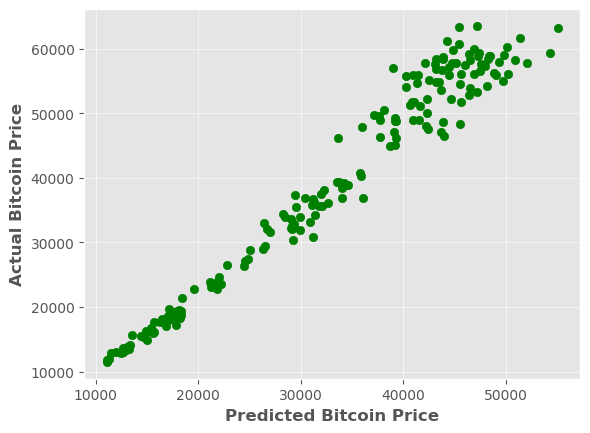

In [90]:
plt.scatter(y_pred, test.values, color="green")
# plt.plot([10000,70000],[10000,70000], 'k--')
plt.xlabel("Predicted Bitcoin Price")
plt.ylabel("Actual Bitcoin Price")
plt.savefig("Real_vs_predicte.png", dpi=300)


In [110]:
actual_daily_price_change = np.diff(test.values)
predicted_daily_price_change = np.diff(y_pred[:, 0])


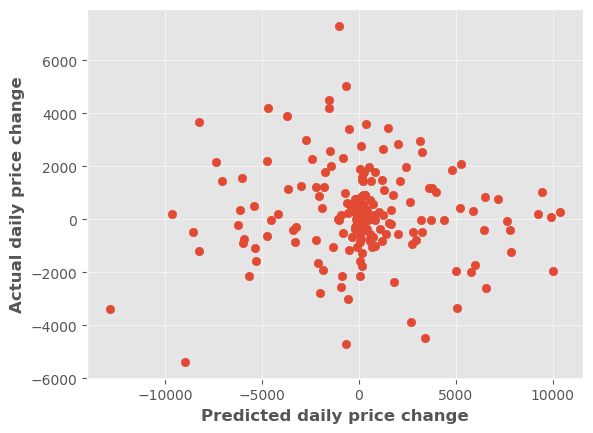

In [111]:
plt.scatter(predicted_daily_price_change, actual_daily_price_change)
# plt.plot([10000,70000],[10000,70000], 'k--')
plt.xlabel("Predicted daily price change")
plt.ylabel("Actual daily price change")
plt.savefig("Real_vs_predicte_price_change.png", dpi=300)


# Facebook Prophet:

In [136]:
train, test = bitcoin_df["Close"].iloc[-1000:-100], bitcoin_df["Close"].iloc[-100:]
train_df = pd.DataFrame({"ds": train.index, "y": train.values})


In [137]:
model = Prophet()
model.fit(train_df)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [155]:
future = model.make_future_dataframe(periods=100)
print(future)


            ds
0   2018-08-06
1   2018-08-07
2   2018-08-08
3   2018-08-09
4   2018-08-10
..         ...
995 2021-05-01
996 2021-05-02
997 2021-05-03
998 2021-05-04
999 2021-05-05

[1000 rows x 1 columns]


In [156]:
forecast = model.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]


,ds,yhat,yhat_lower,yhat_upper
0,2018-08-06,6786.792950,5498.711171,8111.640323
1,2018-08-07,6854.928051,5656.354700,8087.007831
2,2018-08-08,6986.661999,5740.311394,8283.166954
3,2018-08-09,6991.277880,5667.514951,8231.186269
4,2018-08-10,7064.553150,5817.089816,8380.944925
...,...,...,...,...
995,2021-05-01,52680.313389,47547.166339,58340.508185
996,2021-05-02,52866.388878,47636.230151,58543.274676
997,2021-05-03,53117.245576,47671.156837,58894.012267
998,2021-05-04,53350.080641,48079.259951,59138.944177


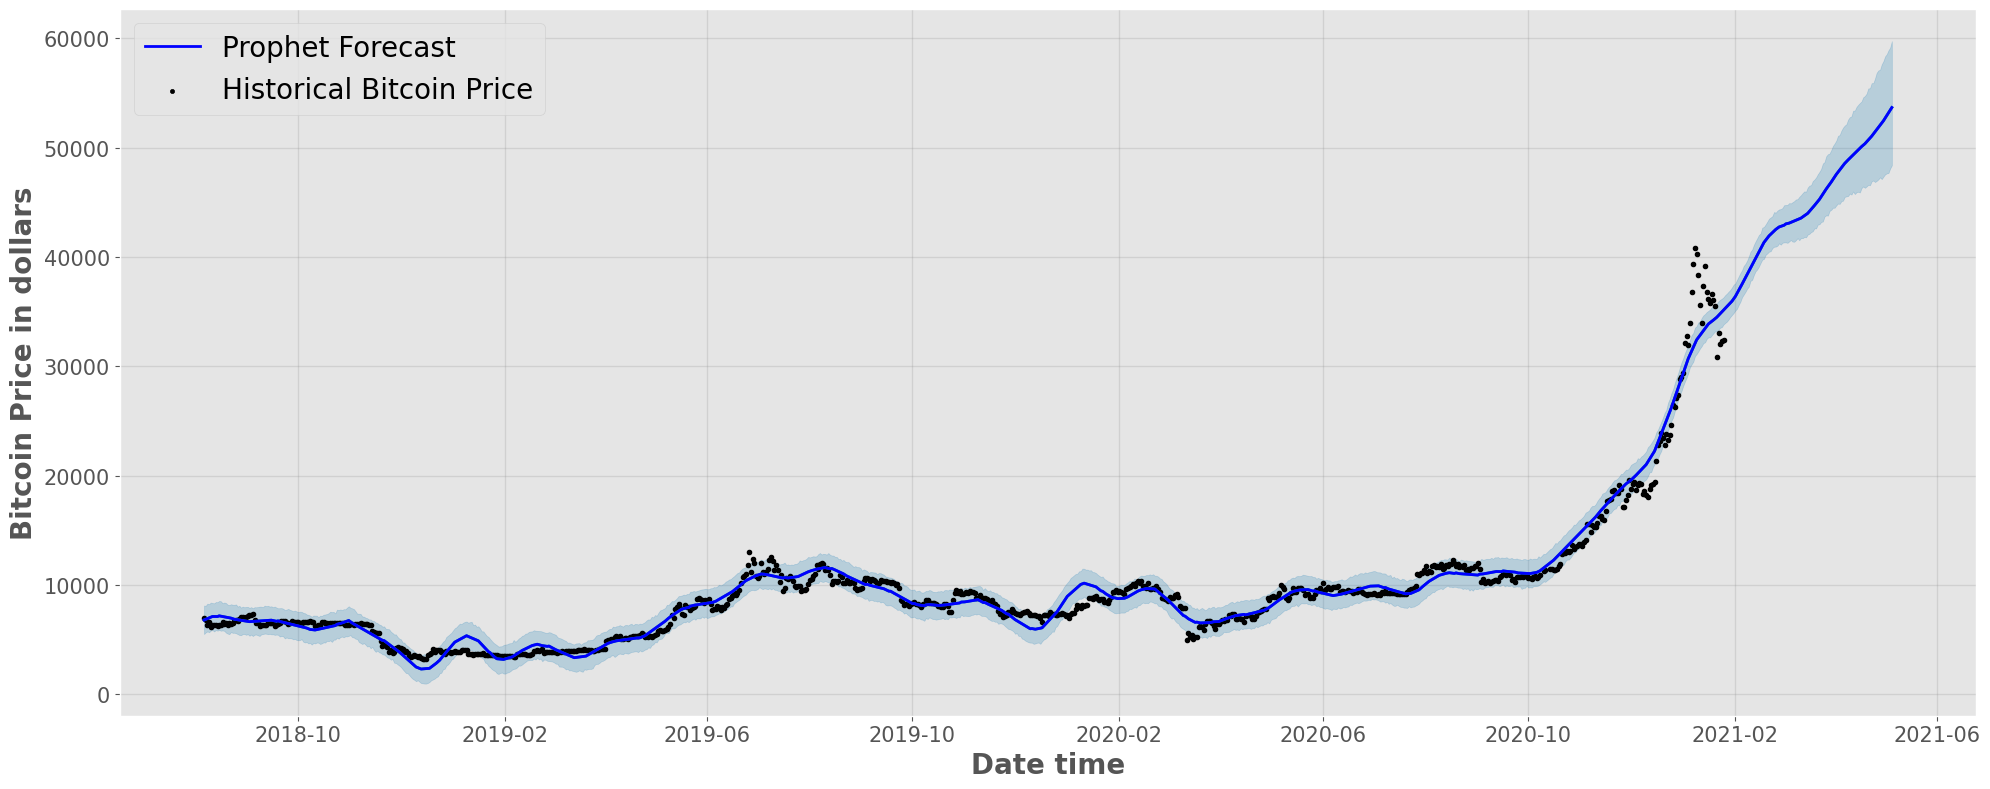

In [157]:
model.plot(forecast, figsize=(20, 8))
plt.plot(forecast["ds"], forecast["yhat"], color="blue", label="Prophet Forecast")
plt.scatter(
    train.index, train.values, marker=".", color="k", label="Historical Bitcoin Price"
)
plt.xlabel("Date time", fontsize=20)
plt.ylabel("Bitcoin Price in dollars", fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(loc=2, fontsize=20)
plt.tight_layout()
plt.savefig("prophet_pred.png")
plt.show()


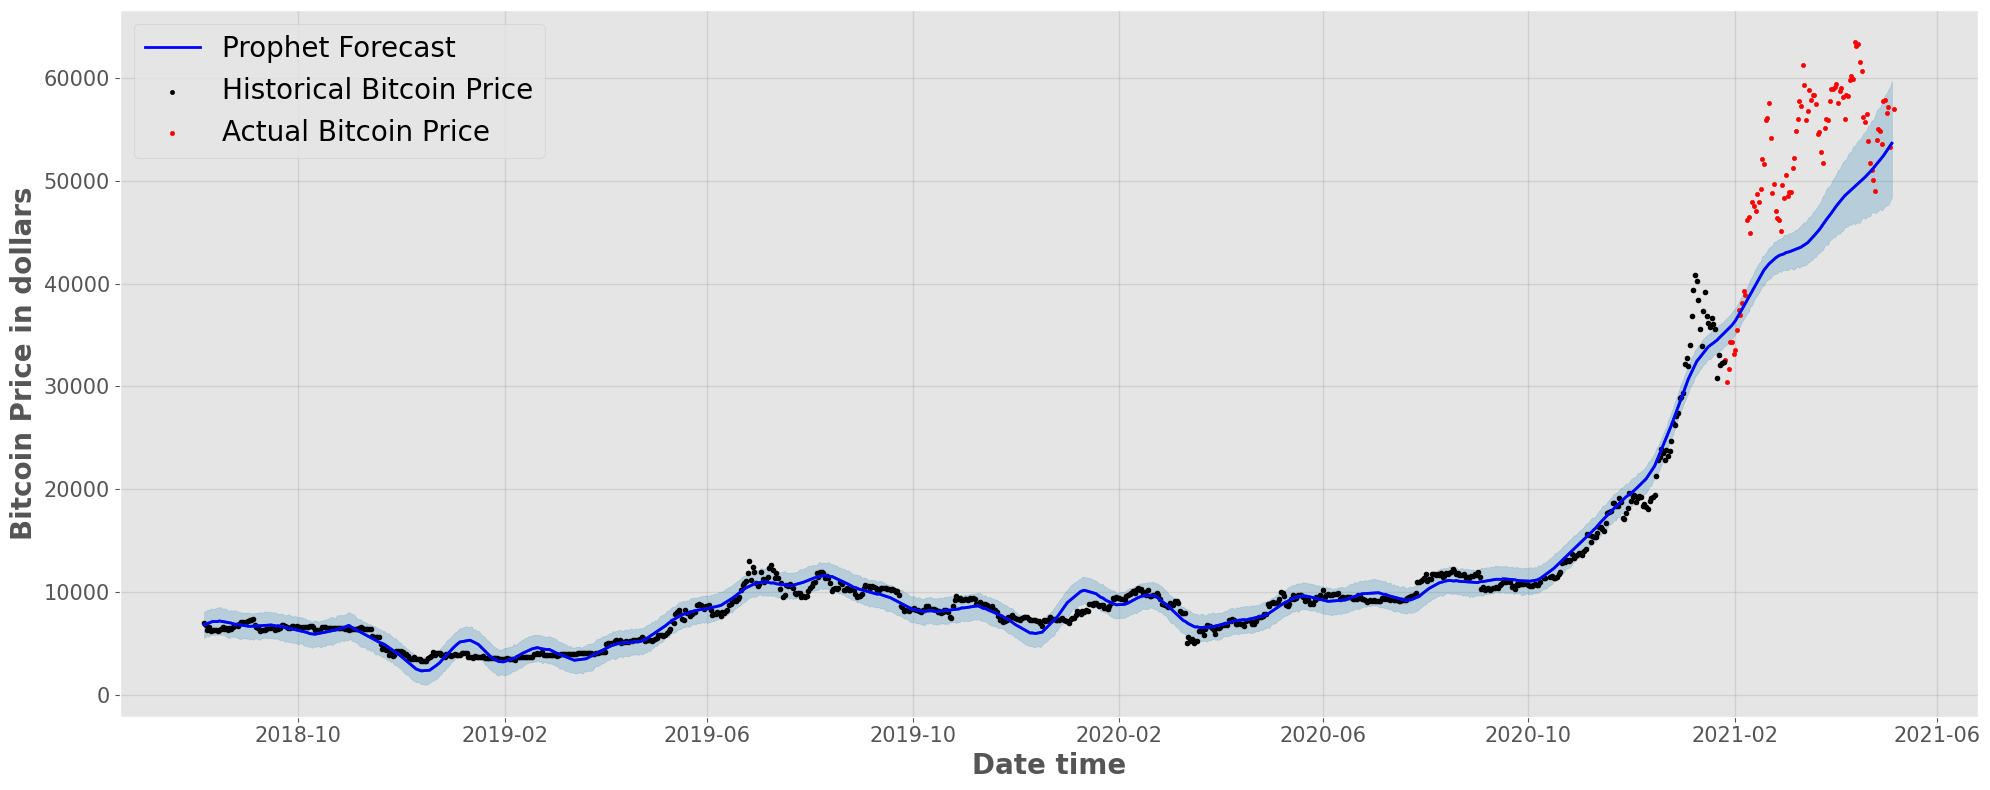

In [159]:
model.plot(forecast, figsize=(20, 8))
plt.plot(forecast["ds"], forecast["yhat"], color="blue", label="Prophet Forecast")
plt.scatter(
    train.index, train.values, marker=".", color="k", label="Historical Bitcoin Price"
)
plt.scatter(
    test.index, test.values, marker=".", color="r", label="Actual Bitcoin Price"
)
plt.xlabel("Date time", fontsize=20)
plt.ylabel("Bitcoin Price in dollars", fontsize=20)
plt.tick_params(labelsize=15)
plt.tight_layout()
plt.legend(loc=2, fontsize=20)
plt.savefig("prophet_pred_vs_true.png")
plt.show()


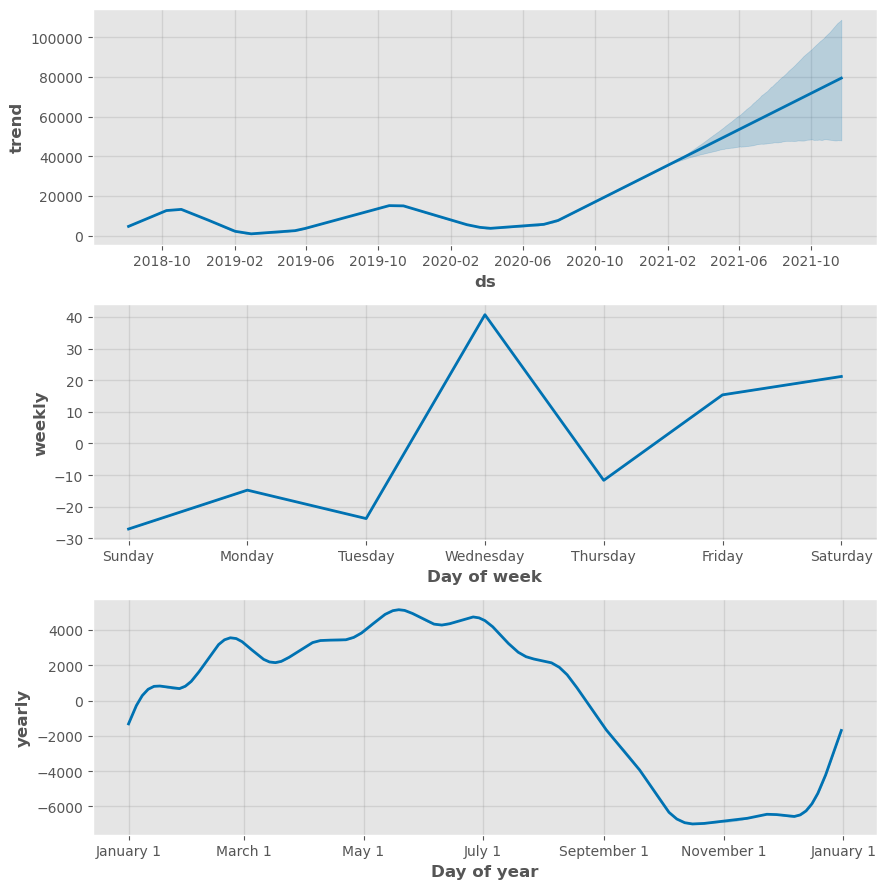

In [154]:
model.plot_components(forecast)
plt.savefig("prophet_model_components.png")
plt.show()
